# **Deep Neural Networks**

In [ ]:
import sklearn
import numpy as np

import tensorflow as tf
from tensorflow import keras

# to make this notebook's output stable across runs
np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
# X_train_full

In [ ]:
X_train_full.shape, y_train_full.shape

((60000, 28, 28), (60000,))

In [ ]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

- Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [ ]:
X_valid, X_train = X_train_full[:5000] / 255.0 , X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000] , y_train_full[5000:]
X_test = X_test / 255.0

In [ ]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Coat


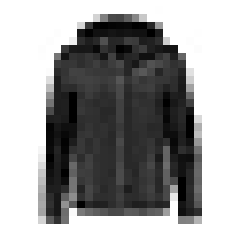

In [ ]:
print(class_names[y_train[0]])
plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

- The validation set contains 5,000 images, and the test set contains 10,000 images

In [ ]:
print(X_valid.shape)
print(X_test.shape)

(5000, 28, 28)
(10000, 28, 28)


- Let's take a look at a sample of the images in the dataset

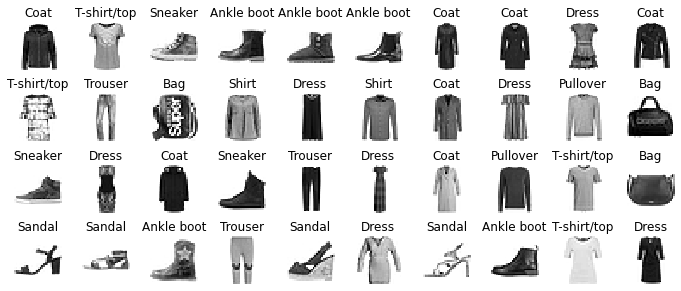

In [ ]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [ ]:
# Model - DNN (Dense Neural Network)
# 784 --> 300 --> 100 --> 10 (No.of Nuerons)
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [ ]:
# Alternatively:
model2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
# model2 = tf.keras.models.clone_model(model)

In [ ]:
# Layers
model.layers

In [ ]:
model2.layers

In [ ]:
# Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Param learned in each layer
'''
1. 784 * 300 + 300 = 235500
2. 300 * 100 + 100 = 30100
3. 100 * 10 + 10 = 1010
'''

'\n1. 784 * 300 + 300 = 235500\n2. 300 * 10 + 10 = 30100\n3. 100 * 10 + 10 = 1010\n'

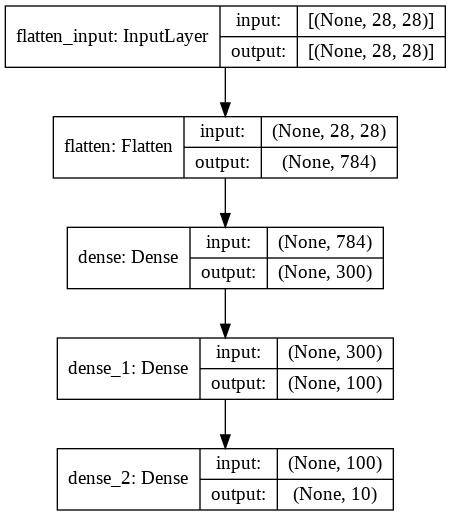

In [ ]:
# The network
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

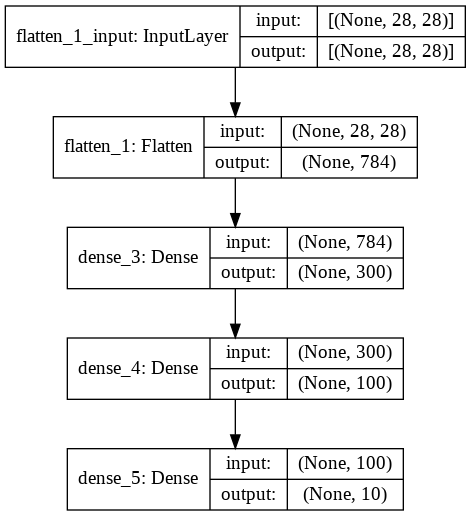

In [ ]:
keras.utils.plot_model(model2, "my_fashion_mnist_model2.png", show_shapes=True)

In [ ]:
hidden1 = model.layers[1]
weights, biases = hidden1.get_weights()
weights
# Initialized using Gaussian or Normalized Distribution

array([[ 0.04905691,  0.06199741,  0.06125991, ...,  0.03424076,
        -0.00176137,  0.0680574 ],
       [ 0.04369026,  0.04276776, -0.05234824, ..., -0.06028406,
        -0.01047719,  0.017982  ],
       [ 0.06001364,  0.00937029, -0.03498409, ...,  0.00951274,
         0.06719972,  0.00721409],
       ...,
       [-0.04820509,  0.01702073,  0.02473909, ..., -0.07004519,
         0.0120994 ,  0.0510966 ],
       [-0.04085691, -0.02360114, -0.00212602, ...,  0.05614038,
        -0.02714582,  0.01882628],
       [-0.02607156, -0.06182602, -0.02133605, ..., -0.01428589,
        -0.07083584, -0.02400318]], dtype=float32)

In [ ]:
weights.shape

(784, 300)

In [ ]:
biases.shape

(300,)

In [ ]:
# Compile
# Stochastic Grdient Descent Optimaztion Algorithm
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd",
              metrics = ["accuracy"])

In [ ]:
model2.compile(loss = "categorical_crossentropy", optimizer = "sgd", metrics = ["accuracy"])

This is equivalent to:

```
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=[keras.metrics.sparse_categorical_accuracy])
```



- We use the `sparse_categorical_crossentropy` loss because we have sparse labels (i.e., for each instance, there is just a target class index, from 0 to 9 in this case), and the classes are exclusive. 
- If instead, we had one target probability per class for each instance (such as one-hot vectors, e.g. [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.] to represent class 3), then we would need to use the `categorical_crossentropy` loss instead. 
- If we were doing binary classification (with one or more binary labels), then we would use the "sigmoid" (i.e., logistic) activation function in the output layer instead of the "softmax" activation function, and we would use the `binary_crossentropy` loss.

- If you want to convert sparse labels (i.e., class indices) to one-hot vector labels, use the `keras.utils.to_categorical()` function. 
- To go the other way round, use the `np.argmax()` function with axis=1.

In [ ]:
print(X_train.shape)
print(y_train.shape)

(55000, 28, 28)
(55000,)


In [ ]:
y_train_cat = keras.utils.to_categorical(y_train)
y_test_cat = keras.utils.to_categorical(y_test)
X_train2 = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test2 = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

In [ ]:
print(y_train_cat.shape)
print(y_test_cat.shape)
print(X_train2.shape)
print(X_test2.shape)

(55000, 10)
(10000, 10)
(55000, 28, 28)
(10000, 28, 28)


In [ ]:
y_train_cat

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid,y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 2ms/step - loss: 1.0275 - accuracy: 0.6813 - val_loss: 0.5363 - val_accuracy: 0.8110
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5105 - accuracy: 0.8238 - val_loss: 0.4444 - val_accuracy: 0.8504
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4592 - accuracy: 0.8384 - val_loss: 0.4140 - val_accuracy: 0.8600
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4191 - accuracy: 0.8527 - val_loss: 0.4006 - val_accuracy: 0.8670
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4004 - accuracy: 0.8600 - val_loss: 0.3913 - val_accuracy: 0.8646
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3817 - accuracy: 0.8672 - val_loss: 0.3902 - val_accuracy: 0.8608
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3699 - accuracy: 0.8701 - val_loss: 0.3748 - val_accuracy:

In [ ]:
history2 = model2.fit(X_train, y_train_cat, epochs=30)

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 1.0245 - accuracy: 0.6776
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5069 - accuracy: 0.8248
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4463 - accuracy: 0.8437
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4139 - accuracy: 0.8526
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4009 - accuracy: 0.8587
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3793 - accuracy: 0.8665
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3684 - accuracy: 0.8705
Epoch 8/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3565 - accuracy: 0.8746
Epoch 9/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3388 - accuracy: 0.8808
Epoch 10/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.333

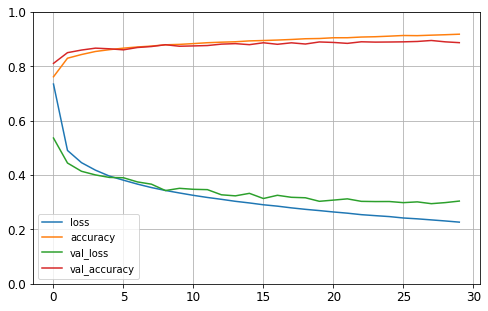

In [ ]:
# Plots
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

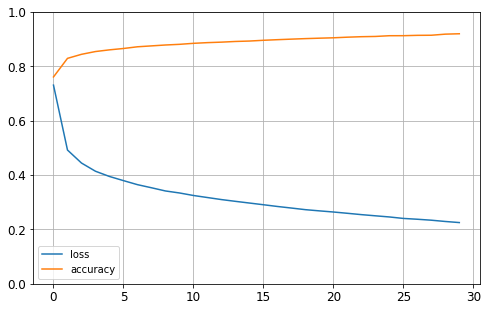

In [ ]:
# Plots
import pandas as pd
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [ ]:
# Test the model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.3401 - accuracy: 0.8773


[0.3400825262069702, 0.8773000240325928]

In [ ]:
model2.evaluate(X_test2, y_test_cat)

313/313 [==============================] - 1s 2ms/step - loss: 0.3421 - accuracy: 0.8769


[0.34207281470298767, 0.8769000172615051]

- Using the trained model to make predictions

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.99],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.01, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

- output is probability per class

In [ ]:
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle boot' 'Pullover' 'Trouser']


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
# Verify
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

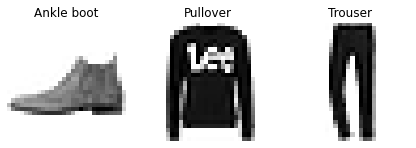

In [ ]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## **Exercise:**
Suppose you have an MLP composed of one input layer with 10 neurons, followed by one hidden layer with 50 artificial neurons, and finally one output layer with 3 artificial neurons. All artificial neurons use the ReLU activation function.

- What is the shape of the input matrix X?
- What are the shapes of the hidden layer’s weight vector Wh and its bias vector bh?
- What are the shapes of the output layer’s weight vector Wo and its bias vector bo?
- What is the shape of the network’s output matrix Y?
- Write the equation that computes the network’s output matrix Y as a function of X, Wh, bh, Wo, and bo.

# **Training Deep Neural Networks**

- **Potential problems**:

- You may be faced with the tricky vanishing gradients problem or the related exploding gradients problem. This is when the gradients grow smaller and smaller, or larger and larger, when flowing backward through the DNN during
training. Both of these problems make lower layers very hard to train.
- You might not have enough training data for such a large network, or it might be too costly to label.
- Training may be extremely slow.
- A model with millions of parameters would severely risk overfitting the training set, especially if there are not enough training instances or if they are too noisy.

**Vanishing/Exploding Gradients Problems**

- The Gradient Descent update leaves the lower
layers’ connection weights virtually unchanged, and training never converges to a good solution. We call this the vanishing gradients problem. 
- In some cases, the opposite can happen: the gradients can grow bigger and bigger until layers get insanely
large weight updates and the algorithm diverges. This is the exploding gradients problem, which surfaces in recurrent neural networks.

- **Leaky ReLU**

- $LR(x) = \max(\alpha x, x)$

- The hyperparameter $\alpha$ defines how much the function “leaks”: it is the slope of the function for $x < 0$ and is typically set to 0.01.

In [ ]:
def leaky_relu(z, alpha=0.01):
    return np.maximum(apha*z,z)

- **Exponential linear unit (ELU)** 

- $ELU(x) = \alpha (\exp(x) - 1), \text{if} \,\, x < 0, \, \text{else} \,\, x$

## **Batch Normalization**

- It consists of adding an operation in the model just before or after the activation function of each
hidden layer. 

- This operation simply zero-centers and normalizes each input, then scales and shifts the result using two new parameter vectors per layer: one for scaling,
the other for shifting. 

- In other words, the operation lets the model learn the optimal scale and mean of each of the layer’s inputs. 

- In order to zero-center and normalize the inputs, the algorithm needs to estimate each input’s mean and standard deviation. 

- It does so by evaluating the mean and standard deviation of the input over the current mini-batch (hence the name “Batch Normalization”). 

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_6 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_7 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

In [ ]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

## **Gradient Clipping**

- Another popular technique to mitigate the exploding gradients problem is to clip the gradients during backpropagation so that they never exceed some threshold. This is called Gradient Clipping.

- All Keras optimizers accept clipnorm or clipvalue arguments:

In [ ]:
optimizer = keras.optimizers.SGD(None)
# or
optimizer = keras.optimizers.SGD(None)

- This optimizer will clip every component of the gradient vector to a value between –1.0 and 1.0. 

- This means that all the partial derivatives of the loss (with regard to each and every trainable parameter) will be clipped between –1.0 and 1.0.

## **Faster Optimizers**

### **Momentum Optimization**

- Imagine a bowling ball rolling down a gentle slope on a smooth surface: it will start out slowly, but it will quickly pick up momentum until it eventually reaches terminal velocity (if there is some friction or air resistance). This is the very simple idea behind
momentum optimization.

- In contrast, regular Gradient Descent will simply take small, regular steps down the slope, so the algorithm will take much more time to reach the bottom.

- GD: $\theta \gets \theta - \eta \nabla J(\theta) $

- Momentum: $m \gets \beta m - \eta \nabla J(\theta)$; $\theta \gets \theta + m$

- To simulate some sort of friction mechanism and prevent the momentum from growing too large, the algorithm introduces a new hyperparameter $\beta$, called the momentum, which must be set between 0 (high friction) and 1 (no friction). A typical momentum value is 0.9.


- Gradient Descent goes down the steep slope quite fast, but then it takes a very long time to go down the valley. In contrast, momentum optimization will roll down the valley faster and faster until it reaches the bottom (the optimum).
   
            

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001 , momentum=0.9)

- The one drawback of momentum optimization is that it adds yet another hyperparameter to tune.

### **Nesterov Accelerated Gradient**

- The Nesterov Accelerated Gradient (NAG) method, also known as Nesterov momentum optimization, measures the gradient of the cost function not at the local position θ but slightly ahead in the direction of the momentum, at θ + βm

- $m \gets \beta m - \eta \nabla J(\theta + \beta m);\,\, \theta \gets \theta + m$

- This small tweak works because in general the momentum vector will be pointing in the right direction (i.e., toward the optimum), so it will be slightly more accurate to use the gradient measured a bit farther in that direction rather than the gradient at the original position.

In [ ]:
optimizer = keras.optimizers.SGD(lr=0.001 , momentum=0.9, nesterov = True)

### **AdaGrad**

- Consider the elongated bowl problem again: Gradient Descent starts by quickly going down the steepest slope, which does not point straight toward the global optimum,
then it very slowly goes down to the bottom of the valley. 

- It would be nice if the algorithm could correct its direction earlier to point a bit more toward the global optimum. 

- The AdaGrad algorithm achieves this correction by scaling down the gradient vector along the steepest dimensions.

- $s \gets s + \nabla J(\theta) \otimes \nabla J(\theta); \,\, \theta \gets \theta - \eta \nabla J(\theta) \oslash \sqrt{s + \epsilon} $

- The first step accumulates the square of the gradients into the vector s (recall that the ⊗ symbol represents the element-wise multiplication). 

- The second step is almost identical to Gradient Descent, but with one big difference: the gradient vector is scaled down by a factor of $\sqrt{s + \epsilon}$ (the ⊘ symbol represents the element-wise division, and ε is a smoothing term to avoid division by zero, typically
set to $10^{-10}$). 

- This algorithm decays the learning rate, but it does so faster for steep dimensions than for dimensions with gentler slopes. This is called an adaptive learning rate.
It helps point the resulting updates more directly toward the global optimum.

In [ ]:
optimizer = keras.optimizers.Adagrad(lr=0.001)

### **RMSProp**

- AdaGrad runs the risk of slowing down a bit too fast and never converging to the global optimum. 

- The RMSProp algorithm fixes this by accumulating
only the gradients from the most recent iterations (as opposed to all the gradients since the beginning of training). It does so by using exponential decay in the first step:

- $s \gets \beta s + (1 - \beta) \nabla J(\theta) \otimes \nabla J(\theta); \,\, \theta \gets \theta - \eta \nabla J(\theta) \oslash \sqrt{s + \epsilon} $

- The decay rate $\beta$ is typically set to 0.9. 

In [ ]:
optimizer = keras.optimizers.Adam(lr=0.001)

### **Adam Optimization**

- Adam, which stands for adaptive moment estimation, combines the ideas of momentum optimization and RMSProp: just like momentum optimization, it keeps track of an exponentially decaying average of past gradients; and just like RMSProp, it keeps track of an exponentially decaying average of past squared gradients:

- $m \gets \beta_1 m - (1 - \beta_1) \nabla J(\theta)$
- $s \gets \beta_2 s + (1 - \beta_2) \nabla J(\theta) \otimes \nabla J(\theta)$
- $\hat{m} \gets \frac{m}{1 - \beta_1^t}$
- $\hat{s} \gets \frac{s}{1 - \beta_2^t}$
- $\theta \gets \theta + \eta \hat{m} \oslash \sqrt{\hat{s} + \epsilon}$

- $t$ represents the iteration number (starting at 1)

- Step 1 computes an exponentially decaying average rather than an exponentially decaying sum, but these are actually equivalent except for a constant factor (the decaying average is just $(1 - \beta_1)$ times the decaying sum). 

- In steps 3 and 4, since $m$ and $s$ are initialized at 0, they will be biased toward 0 at the beginning of training, so these two steps will help boost $m$ and $s$ at the beginning of training.

- The momentum decay hyperparameter $\beta_1$ is typically initialized to 0.9, while the scaling decay hyperparameter $\beta_2$ is often initialized to 0.999. 

In [ ]:
optimizer = keras.optimizers.None

- Since Adam is an adaptive learning rate algorithm (like AdaGrad and RMSProp), it requires less tuning of the learning rate hyperparameter η. 
- We can often use the default value η = 0.001, making Adam even easier to use than Gradient Descent.

## **DropOut**

- Dropout is one of the most popular regularization techniques for deep neural networks.

- At every training step, every neuron (including the
input neurons, but always excluding the output neurons) has a probability $p$ of being temporarily “dropped out,” meaning it will be entirely ignored during this training
step, but it may be active during the next step.

- The hyperparameter $p$ is called the dropout rate, and it is typically set between 10% and 50%.

In [ ]:
# Without Dropout
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dense(10, activation="softmax")
])
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
n_epochs = 20
history = model.fit(X_train,y_train, epochs=n_epochs,
                    validation_data=(X_valid,y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5903 - accuracy: 0.7905 - val_loss: 0.3838 - val_accuracy: 0.8644
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3730 - accuracy: 0.8617 - val_loss: 0.3480 - val_accuracy: 0.8714
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3305 - accuracy: 0.8764 - val_loss: 0.3195 - val_accuracy: 0.8818
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3072 - accuracy: 0.8837 - val_loss: 0.3364 - val_accuracy: 0.8780
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2891 - accuracy: 0.8935 - val_loss: 0.3195 - val_accuracy: 0.8804
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2721 - accuracy: 0.8994 - val_loss: 0.2987 - val_accuracy: 0.8932
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9017 - val_loss: 0.2951 - val_accuracy:

In [ ]:
# With Dropout
model_do = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(300, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.3),
    keras.layers.Dense(100, activation="elu", kernel_initializer="he_normal"),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation="softmax")
])
model_do.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
n_epochs = 20
history = model_do.fit(X_train, y_train, epochs=n_epochs,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.9402 - accuracy: 0.6768 - val_loss: 0.4321 - val_accuracy: 0.8492
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5570 - accuracy: 0.7954 - val_loss: 0.4026 - val_accuracy: 0.8466
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8185 - val_loss: 0.4025 - val_accuracy: 0.8558
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4885 - accuracy: 0.8205 - val_loss: 0.3738 - val_accuracy: 0.8560
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4633 - accuracy: 0.8303 - val_loss: 0.3689 - val_accuracy: 0.8658
Epoch 6/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4536 - accuracy: 0.8311 - val_loss: 0.3615 - val_accuracy: 0.8690
Epoch 7/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4405 - accuracy: 0.8378 - val_loss: 0.3527 - val_accuracy: